# Proyecto 1 : Primera Parte 

### Integrantes :
- Carlos Julio Pinto Rodriguez 
- Juan Camilo Gonzales 

#### 1. Importación de librerias a usar

In [1]:
#!pip install inflect
#!pip install num2words


In [2]:
#pip install nltk spacy 

In [3]:
#Immporta la flexiones del idioma
#import inflect
# librería Natural Language Toolkit, usada para trabajar con textos 
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

import pandas as pd
import numpy as np
import sys
# from pandas_profiling import ProfileReport
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
import matplotlib.pyplot as plt
import num2words
from nltk.stem import SnowballStemmer
import spacy


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oipli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oipli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oipli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Configuring pandas to show all cell content
pd.set_option("display.max_colwidth", None)

In [5]:
nltk.download("punkt")
nltk.download("stopwords")
stop_words = stopwords.words("spanish")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oipli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oipli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

### Carga de datos, Entendimiento y Perfilamiento de datos

In [7]:
 #Carga datos
df_datos= pd.read_excel("./data/cat_345.xlsx")

In [8]:
# Asignación a una nueva variable de los datos leidos
texto_df=df_datos   

In [9]:
textos = texto_df.copy()
textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
#textos['Moda'] = textos['Textos_espanol'].apply(lambda x: max([len(word) for word in x.split(' ')]))
textos['Moda'] = textos['Textos_espanol'].apply(lambda x: max(set(x.split(' ')), key=x.split(' ').count))

textos['Max'] = textos['Conteo'].max()
textos['Min'] = textos['Textos_espanol'].apply(lambda x: min([len(word) for word in x.split(' ')]))


In [10]:
#ProfileReport(textos)

### Preparación de datos  ALTERNATIVA 1

In [11]:
# Limpieza de datos 
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    #p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            #new_word = p.number_to_words(word)
            new_word = num2words.num2words(word, lang='es')
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    return [word.lower() for word in words]

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    return [word for word in words if word not in stop_words]


def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

In [12]:
#TOKENIZACION

textos['words'] = textos['Textos_espanol'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
textos.head()

,Textos_espanol,sdg,Conteo,Moda,Max,Min,words
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,944,de,1513,1,"[ejemplo, naomero, consultas, externas, especialistas, trescientos diecinueve, cada, mil, derechohabientes, sp, comparacia3n, trescientos treinta y ocho, seiscientos veinte, cada, mil, derechohabientes, imss, issste, respectivamente, si, bien, diferencias, pueden, reflejar, necesidad, desigual, poblacia3n, ligeramente, mayor, issste, pueden, justificarse, manera, naomero, recetas, pudieron, ser, surtidas, totalidad, farmacautico, debido, falta, existencias, treinta y tres, dentro, sp, comparacia3n, catorce, dentro, imss, segaon, datos, encuesta, aunque, propias, cifras, institutos, ss, sugieren, tasas, mas, altas, recetas, surtidas, ambas, cifras, encuentran, mas, altas, ocde, gasto, bolsillo, reducido, significativamente, ultima, decada, pesar, esfuerzos, lograr, cobertura, sanitaria, universal, traves, reforma, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,476,del,1513,1,"[dos mil siete, gobierno, central, financio, directamente, solo, 03, gasto, total, salud, realizo, transferencias, especificas, gasto, salud, ascendieron, 56, gasto, total, mayor, parte, gasto, presupuestario, salud, realizan, gobiernos, condados, condados, pobres, solo, pueden, ofrecer, bajo, nivel, atencion, poblacion, local, gobierno, provincial, proporciona, subsidios, lado, oferta, hospitales]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,1207,de,1513,1,"[claramente, factores, jue

In [13]:
#Normalización
stemmer = SnowballStemmer('spanish')



In [14]:

def stem_words(words):
    """Stem words in list of tokenized words using NLTK"""
    return [stemmer.stem(word) for word in words]


In [15]:
#!pip install spacy
!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     --------------------------------------- 0.1/12.9 MB 812.7 kB/s eta 0:00:16
     -- ------------------------------------- 0.7/12.9 MB 5.2 MB/s eta 0:00:03
     --------- ------------------------------ 3.1/12.9 MB 17.9 MB/s eta 0:00:01
     ------------------- -------------------- 6.3/12.9 MB 28.7 MB/s eta 0:00:01
     ----------------------------- ---------- 9.6/12.9 MB 35.9 MB/s eta 0:00:01
     --------------------------------------  12.8/12.9 MB 72.6 MB/s eta 0:00:01
     --------------------------------------- 12.9/12.9 MB 59.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [16]:
import spacy

# Inicializar el modelo de spaCy para español
nlp = spacy.load('es_core_news_sm')

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words using spaCy for Spanish"""
    doc = nlp(" ".join(words))
    return [token.lemma_ if token.pos_ == 'VERB' else token.text for token in doc]

In [17]:
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

In [18]:
textos['words'] = textos['words'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
textos.head()

,Textos_espanol,sdg,Conteo,Moda,Max,Min,words
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,944,de,1513,1,"[ejempl, naomer, consult, extern, especial, trescientos diecinuev, cad, mil, derechohabient, sp, comparacia3n, trescientos treinta y och, seiscientos veint, cad, mil, derechohabient, imss, issste, respect, si, bien, diferent, pued, reflej, neces, desigual, poblacia3n, liger, mayor, issste, pued, justific, maner, naomer, recet, pud, ser, surt, total, farmacaut, deb, falt, existent, treinta y tr, dentr, sp, comparacia3n, catorc, dentr, imss, segaon, dat, encuest, aunqu, propi, cifr, institut, ss, sugier, tas, mas, altas, recet, surt, ambas, cifr, encuentr, mas, altas, ocde, gast, bolsill, reduc, signific, ultim, dec, pes, esfuerz, logr, cobertur, sanitari, universal, trav, reform, sp, ejemplo, naomero, consultas, externas, especialistas, trescientos, diecinueve, cada, mil, derechohabientes, sp, comparacia3n, trescientos, treinta, y, ...]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,476,del,1513,1,"[dos mil siet, gobiern, central, financi, direct, sol, 03, gast, total, salud, realiz, transferent, especif, gast, salud, ascend, 56, gast, total, mayor, part, gast, presupuestari, salud, realiz, gobi, cond, cond, pobr, sol, pued, ofrec, baj, nivel, atencion, poblacion, local, gobiern, provincial, proporcion, subsidi, lad, ofert, hospital, dos, mil, siete, gobierno, central, financio, directamente, solo, 03, gasto, total, salud, realizo, transferencias, especificas, gasto, salud, ascender, 56, gasto, total, mayor, parte, gasto, presupuestario, salud, realizar, gobiernos, condados, condados, pobres, solo, pueden, ofrecer, bajo, nivel, atencion, poblacion, local, gobierno, provincial, proporcionar, subsidios, lado, oferta, hospitales]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el 

In [19]:
#Separacion variable predictora
textos['words'] = textos['words'].apply(lambda x: ' '.join(map(str, x)))
textos.head()

,Textos_espanol,sdg,Conteo,Moda,Max,Min,words
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,944,de,1513,1,ejempl naomer consult extern especial trescientos diecinuev cad mil derechohabient sp comparacia3n trescientos treinta y och seiscientos veint cad mil derechohabient imss issste respect si bien diferent pued reflej neces desigual poblacia3n liger mayor issste pued justific maner naomer recet pud ser surt total farmacaut deb falt existent treinta y tr dentr sp comparacia3n catorc dentr imss segaon dat encuest aunqu propi cifr institut ss sugier tas mas altas recet surt ambas cifr encuentr mas altas ocde gast bolsill reduc signific ultim dec pes esfuerz logr cobertur sanitari universal trav reform sp ejemplo naomero consultas externas especialistas trescientos diecinueve cada mil derechohabientes sp comparacia3n trescientos treinta y ocho seiscientos veinte cada mil derechohabientes imss issstar respectivamente si bien diferencias pueden reflejar necesidad desigual poblacia3n ligeramente mayor issste pueden justificar él manera naomero recetas pudieron ser surtir totalidad farmacautico debido faltar existencias treinta y tres dentro sp comparacia3n catorce dentro imss segaon datos encuesta aunque propias cifras institutos ss sugerir tasas mas altas recetas surtidas ambas cifras encontrar mas altas ocde gasto bolsillo reducido significativamente ultima decada pesar esfuerzos lograr cobertura sanitaria universal traves reforma sp
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,476,del,1513,1,dos mil siet gobiern central financi direct sol 03 gast total salud realiz transferent especif gast salud ascend 56 gast total mayor part gast presupuestari salud realiz gobi cond cond pobr sol pued ofrec baj nivel atencion poblacion local gobiern provincial proporcion subsidi lad ofert hospital dos mil siete gobierno central financio directamente solo 03 gasto total salud realizo transferencias especificas gasto salud ascender 56 gasto total mayor parte gasto presupuestario salud realizar gobiernos condados condados pobres solo pueden ofrecer bajo nivel atencion poblacion local gobierno provincial proporcionar subsidios lado oferta hospitales
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de est

In [20]:
X_data, y_data = textos['words'],textos['sdg']
y_data

0       3
1       3
2       3
3       3
4       3
       ..
2995    5
2996    5
2997    5
2998    5
2999    5
Name: sdg, Length: 3000, dtype: int64

Opcion 1

In [21]:
# Se transforma el texto con una transformación binaria 1 a 1
dummy = CountVectorizer(binary=True)
X_dummy = dummy.fit_transform(X_data)
print(X_dummy.shape)
X_dummy.toarray()[0]

(3000, 21877)


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

Opcion 2

In [22]:
# se puede realizar el conteo de las palabras presentes
count = CountVectorizer()
X_count = count.fit_transform(X_data)
print(X_count.shape)
X_count.toarray()[0]

(3000, 21877)


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

##### Opcion 3

In [23]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X_data)
print(X_tfidf.shape)
X_tfidf.toarray()[0]

(3000, 21877)


array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.02366918])

### Creacion del pipeline de praparacion de los datos
Este se creo siguiendo los pasos de  preparacion de datos antes vistos

In [24]:
# Agregar una clase personalizada para el preprocesamiento como parte del pipeline
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return [preprocessing(text) for text in X]

In [25]:
# Agregar una clase personalizada para tokenizar como parte del pipeline
class TextWordTokenizer(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return [word_tokenize(text) for text in X]

In [26]:
# Agregar una clase personalizada para el  lematización y eliminación de prefijos y sufijos como parte del pipeline
class TextStemLemmatizer(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return [stem_and_lemmatize(text) for text in X]

In [27]:
# Agregar una clase personalizada para desTokenizar  como parte del pipeline
class TokensToTextTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [(lambda x: ' '.join(map(str, x)))(text) for text in X] 

In [28]:
# Pipeline de praparacion de los datos
preData= Pipeline(steps=[
    ('tokenize', TextWordTokenizer()),
    ('preprocessing', TextPreprocessor()),
    ('stem&lemmatize',TextStemLemmatizer()),
    ('tokenstotext',TokensToTextTransformer())]
    )

### APLICACIÓN DEL MODELO
Aplicaremos 3 algoritmos de clasificación para texto como se planteo como de propuesta en la documentación

## Modelamiento con arboles de decision 

In [30]:
# Importamos lo necesario para este algoritmo
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 

In [31]:
# Dividimos los datos en entrenamiento y test
X = X_dummy
Y = y_data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
# buscamos los hiperparametros 
particiones = KFold(n_splits=5, shuffle=True, random_state = 0)
param_grid={'criterion': ['gini', 'entropy'],'max_depth': [2, 4, 6, 8, 10, 20, 30, 50],'min_samples_split': [2, 3, 4, 5, 6, 7]}

In [33]:
#Arbol sin parametros
arbol = DecisionTreeClassifier(random_state=0)

In [34]:
# Busacamos el mejor modelo con GridSearch
best_model = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
best_model.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 20, 30, 50],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [35]:
#Resultado de la busqueda
best_model.best_params_

{'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 2}

In [36]:
#Construccion del arbol con los mejores parametros
best_tree = best_model.best_estimator_
y_pred_train = best_tree.predict(X_train)
y_pred_test = best_tree.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 1.00
Exactitud sobre test: 0.93


In [37]:
# Se genera la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_test)
cm

array([[219,   3,  15],
       [  7, 174,   6],
       [  6,   6, 164]], dtype=int64)

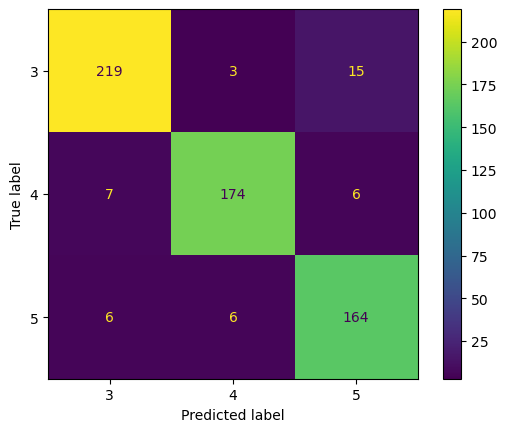

In [38]:
# Se puede visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_tree.classes_)
disp.plot()
plt.savefig("ConfusionMatrixnDecisionTreeClassifier.png")
plt.show()

In [39]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           3       0.94      0.92      0.93       237
           4       0.95      0.93      0.94       187
           5       0.89      0.93      0.91       176

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



Notamos que tenemos muy buenos puntajes, ya que se clasifican correctamente en promedio el 93% de los textos

### Modelamiento de modelo a partir de BoW (CounterVectorizer)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [41]:
X_data, y_data = textos['words'],textos['sdg']
y_data

0       3
1       3
2       3
3       3
4       3
       ..
2995    5
2996    5
2997    5
2998    5
2999    5
Name: sdg, Length: 3000, dtype: int64

In [42]:
X_datos = X_data
Y_datos = y_data
X_train, X_test, y_train, y_test = train_test_split(X_datos, Y_datos, test_size=0.2,  random_state=0)

In [43]:
X_train.shape , X_test.shape


((2400,), (600,))

In [44]:
bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [45]:
X_bow = bow.fit_transform(X_train)

c:\Users\oipli\.conda\envs\sklearn2\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [46]:
print("Vocabulary size:", len(bow.vocabulary_))

Vocabulary size: 19803


In [47]:
bow_model = RandomForestClassifier(random_state=0)

In [48]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=0)

<Axes: >

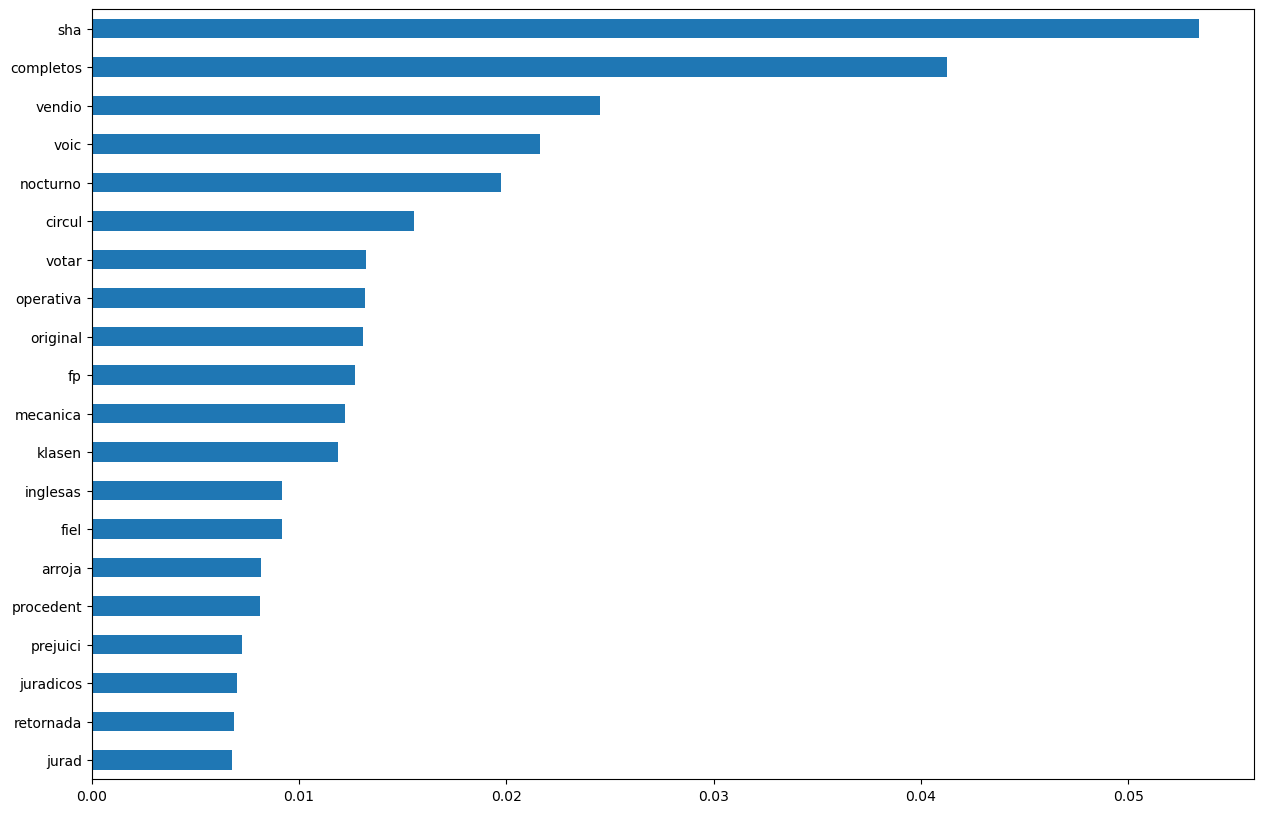

In [49]:
# Feature importance in tree models is an indicator on how relevant is a feature for taking the decision by the model
pd.Series(bow_model.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [50]:
bow_estimators = bow_model.estimators_
print("Number of trees:", len(bow_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 79.08


In [51]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test))

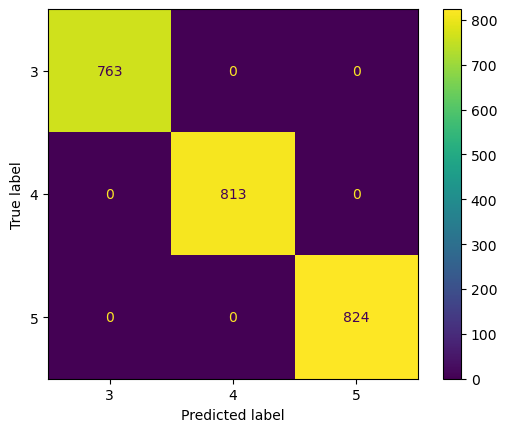

In [52]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

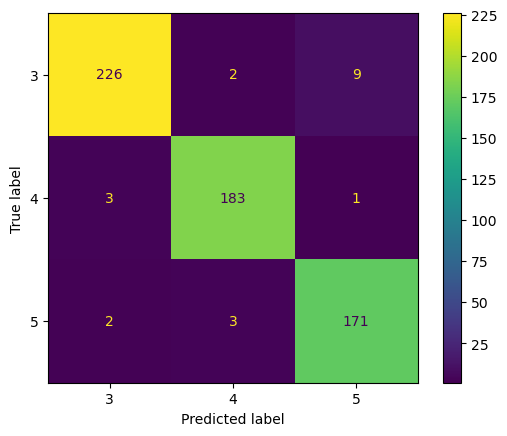

In [53]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [54]:
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
print(classification_report(Y_test, y_test_bow_predict))


              precision    recall  f1-score   support

           3       0.98      0.95      0.97       237
           4       0.97      0.98      0.98       187
           5       0.94      0.97      0.96       176

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



### Modelo de arbol de decision pero con TF-IDF

In [55]:
# Dividimos los datos en entrenamiento y test
X = X_tfidf
Y = y_data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [56]:
# buscamos los hiperparametros 
particiones = KFold(n_splits=5, shuffle=True, random_state = 0)
param_grid={'criterion': ['gini', 'entropy'],'max_depth': [2, 4, 6, 8, 10, 20, 30, 50],'min_samples_split': [2, 3, 4, 5, 6, 7]}

In [57]:
#Arbol sin parametros
arbol = DecisionTreeClassifier(random_state=0)

In [58]:
# Busacamos el mejor modelo con GridSearch
best_model = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
best_model.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 20, 30, 50],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [59]:
#Resultado de la busqueda
best_model.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}

In [60]:
#Construccion del arbol con los mejores parametros
best_tree = best_model.best_estimator_
y_pred_train = best_tree.predict(X_train)
y_pred_test = best_tree.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.97
Exactitud sobre test: 0.94


In [61]:
# Se genera la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_test)
cm

array([[229,   2,   6],
       [ 12, 170,   5],
       [ 10,   1, 165]], dtype=int64)

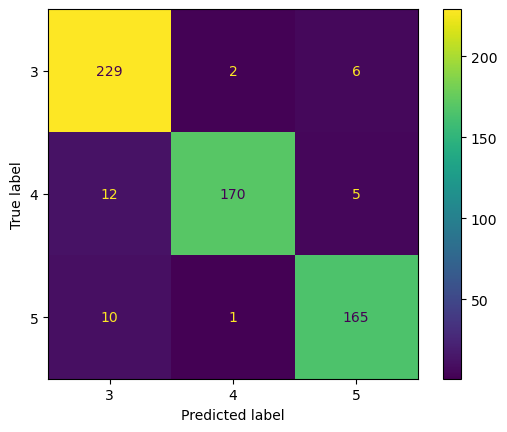

In [62]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_tree.classes_)
disp.plot()

In [63]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           3       0.91      0.97      0.94       237
           4       0.98      0.91      0.94       187
           5       0.94      0.94      0.94       176

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



### Modelamiento con otro alternativa de tf-idf

In [64]:
print (X_data)

0                                                                                                                                                                                                                                      ejempl naomer consult extern especial trescientos diecinuev cad mil derechohabient sp comparacia3n trescientos treinta y och seiscientos veint cad mil derechohabient imss issste respect si bien diferent pued reflej neces desigual poblacia3n liger mayor issste pued justific maner naomer recet pud ser surt total farmacaut deb falt existent treinta y tr dentr sp comparacia3n catorc dentr imss segaon dat encuest aunqu propi cifr institut ss sugier tas mas altas recet surt ambas cifr encuentr mas altas ocde gast bolsill reduc signific ultim dec pes esfuerz logr cobertur sanitari universal trav reform sp ejemplo naomero consultas externas especialistas trescientos diecinueve cada mil derechohabientes sp comparacia3n trescientos treinta y ocho seiscientos veinte cad

### Creamos el pipeline del modelo que nos dio mejor F1-Score

In [ ]:
bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)
bow_model = RandomForestClassifier(random_state=0)

In [70]:
# Pipeline del  modelo usando el 
pipeline = Pipeline(steps=[("preprocessor", preData),
                           ('bow',CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)),
                           ('model',RandomForestClassifier(random_state=0))])
pipeline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('tokenize', TextWordTokenizer()),
                                 ('preprocessing', TextPreprocessor()),
                                 ('stem&lemmatize', TextStemLemmatizer()),
                                 ('tokenstotext', TokensToTextTransformer())])),
                ('bow',
                 CountVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x00000195A7693060>)),
                ('model', RandomForestClassifier(random_state=0))])

In [71]:
# entrenamos el modelo
X_datos = X_data
Y_datos = y_data
X_trainPipe, X_testPipe, y_trainPipe, y_testPipe = train_test_split(X_datos, Y_datos, test_size=0.2,  random_state=0)

2370                                                                                                                                                                                                                                           met 54 sa3l reconoc valor trabaj domast cuid remuner sin tambi indic form deb produc reconoc sab amedi provisia3n servici paoblic infraestructur polat proteccia3n sociala4 trabaj domast cuid remuner deb reconoc reduc redistribu mediant polat cuid vaas tambi recuadr 33 atend neces cuid nia suel hac mujer principal proveedor cuid remuner carezc ingres tiempo9 pued acarr penaliz larg plaz merc laboral si interrump carrer profesional dedic cuid recuadr 31 acual innov pued surg polat social bas lent cuid meta 54 sa3lo reconocer valora trabajo domastico cuidados remunerado sino tambiar indicar formas debe producir él reconocimiento saber amediante provisia3n servicios paoblicos infraestructuras polaticas proteccia3n sociala4 trabajo domastico cuidados remun

In [72]:
pipeline.fit(X_trainPipe,y_trainPipe)

c:\Users\oipli\.conda\envs\sklearn2\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('tokenize', TextWordTokenizer()),
                                 ('preprocessing', TextPreprocessor()),
                                 ('stem&lemmatize', TextStemLemmatizer()),
                                 ('tokenstotext', TokensToTextTransformer())])),
                ('bow',
                 CountVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x00000195A7693060>)),
                ('model', RandomForestClassifier(random_state=0))])

In [73]:
y_predictPipe_train = pipeline.predict(X_trainPipe)
y_predictPipe_test = pipeline.predict(X_testPipe)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_trainPipe, y_predictPipe_train))
print('Exactitud sobre test: %.2f' % accuracy_score(y_testPipe, y_predictPipe_test))

Exactitud sobre entrenamiento: 1.00
Exactitud sobre test: 0.97


In [74]:
# Se genera la matriz de confusión
cm = confusion_matrix(y_testPipe, y_predictPipe_test)
cm

array([[227,   2,   8],
       [  2, 184,   1],
       [  1,   3, 172]], dtype=int64)

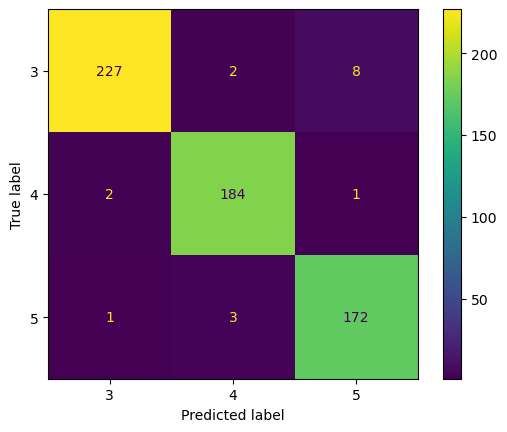

In [75]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipeline.classes_)
disp.plot()

In [76]:
# Mostrar reporte de clasificación
print(classification_report(y_testPipe, y_predictPipe_test))

              precision    recall  f1-score   support

           3       0.99      0.96      0.97       237
           4       0.97      0.98      0.98       187
           5       0.95      0.98      0.96       176

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [78]:
import joblib
from joblib import dump, load
joblib.dump(pipeline, 'modelo.joblib')

['modelo.joblib']

# Predicciones

In [86]:
# Manera de utilizar el modelo
# Importamos el modelo
modelo_load = joblib.load('modelo.joblib')
modelo_load

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('tokenize', TextWordTokenizer()),
                                 ('preprocessing', TextPreprocessor()),
                                 ('stem&lemmatize', TextStemLemmatizer()),
                                 ('tokenstotext', TokensToTextTransformer())])),
                ('bow',
                 CountVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x00000195A7693060>)),
                ('model', RandomForestClassifier(random_state=0))])

In [81]:
# Cargamos los datos
df_datos_unlabeled= pd.read_excel("./data/SinEtiquetatest_cat_345.xlsx")

In [87]:
df_datos_unlabeled.head()

,Textos_espanol,sdg
0,"Se basa en los nueve años de educación básica (seis de primaria y tres de secundaria). Los alumnos que acceden al segundo ciclo de secundaria pueden ir a un centro de orientación más académica o a un centro de formación profesional. Esto se aplica tanto en el sistema islámico como en el no islámico. La enseñanza secundaria superior formal comprende la enseñanza general (sekolah menengah atas, o SMA), la enseñanza profesional (sekolah menengah kejuruan, o SMK), las escuelas secundarias superiores islámicas (madrasah aliyah, o MA) y la enseñanza profesional islámica (madrasah aliyah kejuruan, o MAK). Este capítulo se centra principalmente en la enseñanza secundaria superior académica, mientras que el capítulo 5 trata de la formación profesional. Se está trabajando en el desarrollo de colegios comunitarios y vías alternativas de acceso a la enseñanza superior.",NaN
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",NaN
2,"AsÃ, por ejemplo, el estigma asociado a los beneficiarios de prestaciones sociales o a los pobres aumenta su desventaja. Del mismo modo, los errores de dignidad y reconocimiento pueden causar desventajas.54 La infravaloraciÃ³n del trabajo de las mujeres es un error de reconocimiento que causa directamente desventajas socioeconÃ³micas, por lo que el derecho a la igualdad de retribuciÃ³n por un trabajo de igual valor es una sÃntesis importante de las dos primeras dimensiones del derecho a la igualdad: reparar la desventaja y abordar el estigma y los estereotipos. Tanto el Comité de Derechos Económicos, Sociales y Culturales como el Comité para la Eliminación de la Discriminación contra la Mujer han dado este paso. Directrices para la presentación de informes"", párrafo 29, CDESC, Ecuador, op. cit.",NaN
3,"Hay muchos profesores no cualificados en las escuelas, ya que es difícil contratar a profesores cualificados. Un indicio del reconocimiento del importante papel de los profesores en este contexto es la inclusiÃ³n por Alberta de preguntas adicionales en la Encuesta Internacional sobre la EnseÃ±anza y el Aprendizaje de la OCDE de 2018 relativas a la comprensiÃ³n por parte de los profesores y los lÃderes escolares de cuestiones relacionadas con las culturas indÃgenas, la historia y el trabajo con alumnos indÃgenas, asÃ como sobre el desarrollo profesional pertinente. El enfoque holÃstico de los pueblos indÃgenas hace hincapiÃ© en lo mucho que estos contribuyen al bienestar general de los niÃ±os, asÃ como al de todos los demÃ¡s, ademÃ¡s de factores como las ventajas y desventajas materiales. El trauma sufrido por los pueblos indígenas, incluso a través del sistema de escuelas residenciales, todavía es sentido agudamente por muchos. De hecho, se nos dijo que los síntomas del trauma pueden aumentar en lugar de disminuir con el paso del tiempo, exacerbados por las relaciones intergeneracionales. Frente a este panorama más amplio, pueden comprenderse mejor los estudios específicos de det

In [88]:
# Usamos el pipeline
y_pred = modelo_load.predict(df_datos_unlabeled['Textos_espanol'])
y_pred

array([4, 3, 5, ..., 4, 3, 4], dtype=int64)

In [89]:
len(y_pred)

1759

In [94]:
# Copiamos
df_datos_unlabeled_copy = df_datos_unlabeled.copy().drop('sdg', axis=1)

In [95]:
# Agregamos la columna con los valores predichos
df_datos_unlabeled_copy['sdg'] = y_pred

In [96]:
# Exportamos los datos
df_datos_unlabeled_copy.to_excel('./data/SinEtiquetatest_cat_345_predictions.xlsx', sheet_name='Sheet1', index=False)